___
# PROJETO 3

## GRUPO:
### Bruno Xavier Gomes
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


___
## Estudo da Distribuição da Média Amostral  $\bar{X}$  via SIMULAÇÃO

In [2]:
dataG = stats.gamma.rvs(4, size = 1000000)
dfGamma = pd.DataFrame(dataG)

In [3]:
medG = dataG.mean()
varG = dataG.var()
print('Média:', medG, '\nVariância:', varG)

Média: 3.99773931651 
Variância: 3.99528186474


In [13]:
n2 = 2
lista_media2 = []

for i in range(10000):
    soma2 = 0
    x2 = np.random.choice(dataG, n2)
    for i in range(len(x2)):
        soma2 += x2[i]
        media2 = soma2/n2
    lista_media2.append(media2)
    
#============================================================================
n4 = 4
lista_media4 = []

for i in range(10000):
    soma4 = 0
    x4 = np.random.choice(dataG, n4)
    for i in range(len(x4)):
        soma4 += x4[i]
        media4 = soma4/n4
    lista_media4.append(media4)

#============================================================================
n20 = 20
lista_media20 = []

for i in range(10000):
    soma20 = 0
    x20 = np.random.choice(dataG, n20)
    for i in range(len(x20)):
        soma20 += x20[i]
        media20 = soma20/n20
    lista_media20.append(media20)
    
#============================================================================
n50 = 50
lista_media50 = []
lista_terceiro = [] # para a parte da amostra aleatória
lista_15 = [] # para a parte da amostra aleatória

for i in range(10000):
    soma50 = 0
    x50 = np.random.choice(dataG, n50)
    lista_terceiro.append(x50[2]) # para a parte da amostra aleatória
    lista_15.append(x50[14]) # para a parte da amostra aleatória
    for i in range(len(x50)):
        soma50 += x50[i]
        media50 = soma50/n50
    lista_media50.append(media50)

In [5]:
df2 = sorted(lista_media2)
df2 = pd.Series(df2)

df4 = sorted(lista_media4)
df4 = pd.Series(df4)

df20 = sorted(lista_media20)
df20 = pd.Series(df20)

df50 = sorted(lista_media50)
df50 = pd.Series(df50)

mu2 = df2.mean()
var2 = df2.var()

mu4 = df4.mean()
var4 = df4.var()

mu20 = df20.mean()
var20 = df20.var()

mu50 = df50.mean()
var50 = df50.var()

In [6]:
print('Média:', dataG.mean(), '\nVariância:', dataG.var())
print('\nMédia amostral para n=2:', mu2, '\nVariância amostral para n=2:', var2)
print('\nMédia amostral para n=4:', mu4, '\nVariância amostral para n=4:', var4)
print('\nMédia amostral para n=20:', mu20, '\nVariância amostral para n=20:', var20)
print('\nMédia amostral para n=50:', mu50, '\nVariância amostral para n=50:', var50)

Média: 3.99773931651 
Variância: 3.99528186474

Média amostral para n=2: 3.9900954117233485 
Variância amostral para n=2: 1.9996964246029203

Média amostral para n=4: 3.988607753788356 
Variância amostral para n=4: 0.9838658222191122

Média amostral para n=20: 4.002343816121491 
Variância amostral para n=20: 0.20115128732338824

Média amostral para n=50: 3.995532525838086 
Variância amostral para n=50: 0.07828803889352699


In [7]:
k = math.sqrt(200)

a = (dfGamma.max() - dfGamma.min())/math.sqrt(1000000)
faixa = np.arange(dfGamma.max(), dfGamma.min(), a)

a2 = (max(lista_media2) - min(lista_media2))/k
faixa2 = np.arange(min(lista_media2), max(lista_media2), a2)

a4 = (max(lista_media4) - min(lista_media4))/k
faixa4 = np.arange(min(lista_media4), max(lista_media4), a4)

a20 = (max(lista_media20) - min(lista_media20))/k
faixa20 = np.arange(min(lista_media20), max(lista_media20), a20)

a50 = (max(lista_media50) - min(lista_media50))/k
faixa50 = np.arange(min(lista_media50), max(lista_media50), a50)

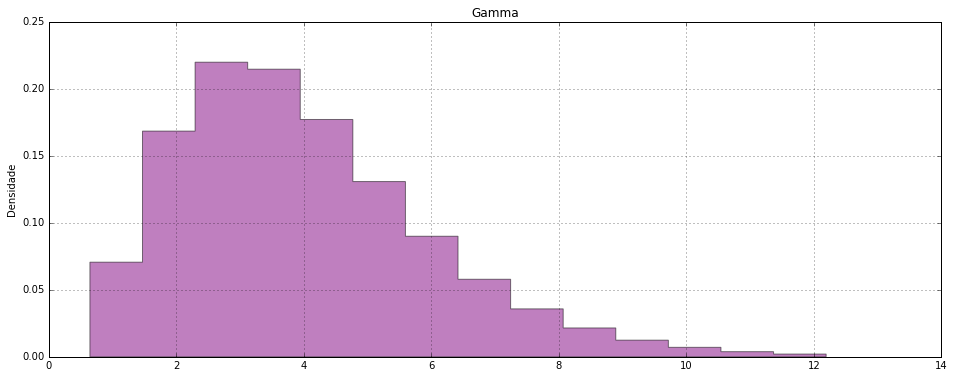

In [8]:
plot = dfGamma.plot.hist(bins = faixa2, title = 'Gamma', alpha = 0.5, color = 'purple', normed = 1,
                     histtype = 'stepfilled', grid = True, figsize = (16, 6), legend = False)
plt.ylabel('Densidade')

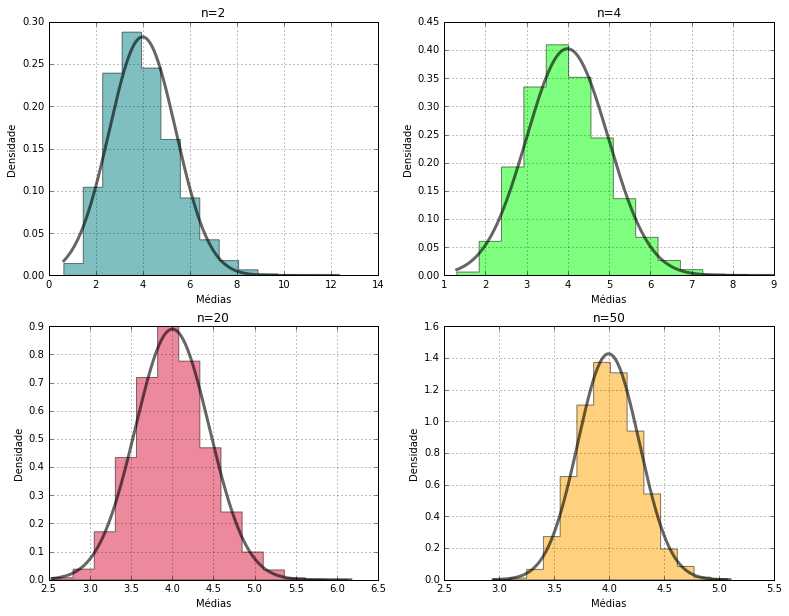

In [10]:
fig = plt.figure(figsize = (13, 10))

#============================================================================
plt.subplot(221)
plot = df2.plot.hist(bins = faixa2, title = 'n=2', alpha = 0.5, color = 'teal', normed = 1,
                     histtype = 'stepfilled', grid = True)
plt.plot(df2, stats.norm.pdf(df2, loc = mu2, scale = math.sqrt(var2)), lw = 3, alpha = 0.6, color = 'black')
plt.xlabel('Médias')
plt.ylabel('Densidade')

#============================================================================
plt.subplot(222)
plot = df4.plot.hist(bins = faixa4, title = 'n=4', alpha = 0.5, color = 'lime', normed = 1,
                     histtype = 'stepfilled', grid = True)
plt.plot(df4, stats.norm.pdf(df4, loc = mu4, scale = math.sqrt(var4)), lw = 3, alpha = 0.6, color = 'black')
plt.xlabel('Médias')
plt.ylabel('Densidade')

#============================================================================
plt.subplot(223)
plot = df20.plot.hist(bins = faixa20, title = 'n=20', alpha = 0.5, color = 'crimson', normed = 1,
                     histtype = 'stepfilled', grid = True)
plt.plot(df20, stats.norm.pdf(df20, loc = mu20, scale = math.sqrt(var20)), lw = 3, alpha = 0.6, color = 'black')
plt.xlabel('Médias')
plt.ylabel('Densidade')

#============================================================================
plt.subplot(224)
plot = df50.plot.hist(bins = faixa50, title = 'n=50', alpha = 0.5, color = 'orange', normed = 1,
                     histtype = 'stepfilled', grid = True)
plt.plot(df50, stats.norm.pdf(df50, loc = mu50, scale = math.sqrt(var50)), lw = 3, alpha = 0.6, color = 'black')
plt.xlabel('Médias')
plt.ylabel('Densidade')

### Amostra Aleatória

In [20]:
df3 = sorted(lista_terceiro)
df3 = pd.Series(df3)

mu3 = df3.mean()
var3 = df3.var()

a3 = (max(lista_terceiro) - min(lista_terceiro))/k
faixa3 = np.arange(min(lista_terceiro), max(lista_terceiro), a3)

df15 = sorted(lista_15)
df15 = pd.Series(df15)

mu15 = df15.mean()
var15 = df15.var()

a15 = (max(lista_15) - min(lista_15))/k
faixa15 = np.arange(min(lista_15), max(lista_15), a15)

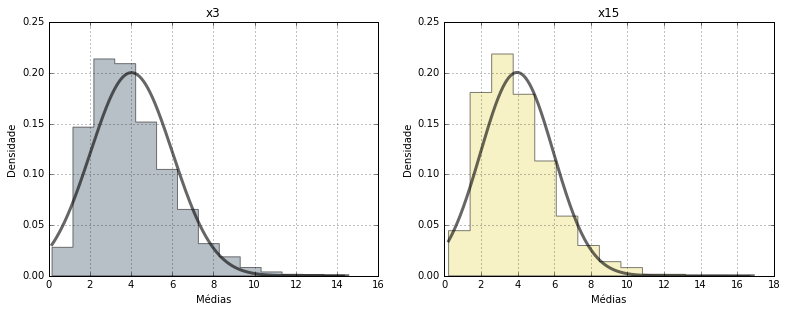

In [22]:
fig = plt.figure(figsize = (13, 10))

#============================================================================
plt.subplot(221)
plot = df3.plot.hist(bins = faixa3, title = 'x3', alpha = 0.5, color = 'slategrey', normed = 1,
                     histtype = 'stepfilled', grid = True)
plt.plot(df3, stats.norm.pdf(df3, loc = mu3, scale = math.sqrt(var3)), lw = 3, alpha = 0.6, color = 'black')
plt.xlabel('Médias')
plt.ylabel('Densidade')

#============================================================================
plt.subplot(222)
plot = df15.plot.hist(bins = faixa15, title = 'x15', alpha = 0.5, color = 'khaki', normed = 1,
                     histtype = 'stepfilled', grid = True)
plt.plot(df15, stats.norm.pdf(df15, loc = mu15, scale = math.sqrt(var15)), lw = 3, alpha = 0.6, color = 'black')
plt.xlabel('Médias')
plt.ylabel('Densidade')

In [26]:
cor = df3.corr(df15)
print('A correlação entre df3 e df15 é de:', cor)

A correlação entre df3 e df15 é de: 0.999536047231


___
## Estudo da Distribuição de  $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$  e de $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ via SIMULAÇÃO

In [28]:
muN = 10
varN = 4

dataN = stats.norm.rvs(loc = 10, scale = 2, size = 1000000)
dfNorm = pd.DataFrame(dataN)

In [30]:
medN = dataN.mean()
varN = dataN.var()
dpN = math.sqrt(varN)
print('Média:', medN, '\nVariância:', varN)

Média: 9.99922921943 
Variância: 3.99915920524


In [44]:
n4 = 4
l_media4 = []
l_dp4 = []
l_z4 = []
l_t4 = []

for i in range(10000):
    soma4 = 0
    var4 = 0
    x4 = np.random.choice(dataN, n4)
    for i in range(len(x4)):
        soma4 += x4[i]
        media4 = soma4/n4
        var4 += ((x4[i] - media4)**2)/n4
        
    dp4 = math.sqrt(var4)
    z4 = ((x4[i] - media4)/(dpN/math.sqrt(n4)))
    t4 = ((x4[i] - media4)/(dp4/math.sqrt(n4)))
        
    l_media4.append(media4)
    l_dp4.append(dp4)
    l_z4.append(z4)
    l_t4.append(t4)
    
#============================================================================
n20 = 20
l_media20 = []
l_dp20 = []
l_z20 = []
l_t20 = []

for i in range(10000):
    soma20 = 0
    var20 = 0
    x20 = np.random.choice(dataN, n20)
    for i in range(len(x20)):
        soma20 += x20[i]
        media20 = soma20/n20
        var20 += ((x20[i] - media20)**2)/n20
        
    dp20 = math.sqrt(var20)
    z20 = ((x20[i] - media20)/(dpN/math.sqrt(n20)))
    t20 = ((x20[i] - media20)/(dp20/math.sqrt(n20)))
        
    l_media20.append(media20)
    l_dp20.append(dp20)
    l_z20.append(z20)
    l_t20.append(t20)
    
#============================================================================
n50 = 50
l_media50 = []
l_dp50 = []
l_z50 = []
l_t50 = []

for i in range(10000):
    soma50 = 0
    var50 = 0
    x50 = np.random.choice(dataN, n50)
    for i in range(len(x50)):
        soma50 += x50[i]
        media50 = soma50/n50
        var50 += ((x50[i] - media50)**2)/n50
        
    dp50 = math.sqrt(var50)
    z50 = ((x50[i] - media50)/(dpN/math.sqrt(n50)))
    t50 = ((x50[i] - media50)/(dp50/math.sqrt(n50)))
        
    l_media50.append(media50)
    l_dp50.append(dp50)
    l_z50.append(z50)
    l_t50.append(t50)
    
#============================================================================
n300 = 300
l_media300 = []
l_dp300 = []
l_z300 = []
l_t300 = []

for i in range(10000):
    soma300 = 0
    var300 = 0
    x300 = np.random.choice(dataN, n300)
    for i in range(len(x300)):
        soma300 += x300[i]
        media300 = soma300/n300
        var300 += ((x300[i] - media300)**2)/n300
        
    dp300 = math.sqrt(var300)
    z300 = ((x300[i] - media300)/(dpN/math.sqrt(n300)))
    t300 = ((x300[i] - media300)/(dp300/math.sqrt(n300)))
        
    l_media300.append(media300)
    l_dp300.append(dp300)
    l_z300.append(z300)
    l_t300.append(t300)

In [63]:
dfz4 = sorted(l_z4)
dfz4 = pd.DataFrame(dfz4)

dft4 = sorted(l_t4)
dft4 = pd.DataFrame(dft4)

az4 = (max(l_z4) - min(l_z4))/k
faixaz4 = np.arange(min(l_z4), max(l_z4), az4)

at4 = (max(l_t4) - min(l_t4))/k
faixat4 = np.arange(min(l_t4), max(l_t4), at4)

medz4 = dfz4.mean()
dpz4 = math.sqrt(dfz4.var())

medt4 = dft4.mean()
dpt4 = math.sqrt(dft4.var())
#============================================================================

dfz20 = sorted(l_z20)
dfz20 = pd.DataFrame(dfz20)

dft20 = sorted(l_t20)
dft20 = pd.DataFrame(dft20)

az20 = (max(l_z20) - min(l_z20))/k
faixaz20 = np.arange(min(l_z20), max(l_z20), az20)

at20 = (max(l_t20) - min(l_t20))/k
faixat20 = np.arange(min(l_t20), max(l_t20), at20)

medz20 = dfz20.mean()
dpz20 = math.sqrt(dfz20.var())

medt20 = dft20.mean()
dpt20 = math.sqrt(dft20.var())
#============================================================================

dfz50 = sorted(l_z50)
dfz50 = pd.DataFrame(dfz50)

dft50 = sorted(l_t50)
dft50 = pd.DataFrame(dft50)

az50 = (max(l_z50) - min(l_z50))/k
faixaz50 = np.arange(min(l_z50), max(l_z50), az50)

at50 = (max(l_t50) - min(l_t50))/k
faixat50 = np.arange(min(l_t50), max(l_t50), at50)

medz50 = dfz50.mean()
dpz50 = math.sqrt(dfz50.var())

medt50 = dft50.mean()
dpt50 = math.sqrt(dft50.var())
#============================================================================

dfz300 = sorted(l_z300)
dfz300 = pd.DataFrame(dfz300)

dft300 = sorted(l_t300)
dft300 = pd.DataFrame(dft300)

az300 = (max(l_z300) - min(l_z300))/k
faixaz300 = np.arange(min(l_z300), max(l_z300), az300)

at300 = (max(l_t300) - min(l_t300))/k
faixat300 = np.arange(min(l_t300), max(l_t300), at300)

medz300 = dfz300.mean()
dpz300 = math.sqrt(dfz300.var())

medt300 = dft300.mean()
dpt300 = math.sqrt(dft300.var())

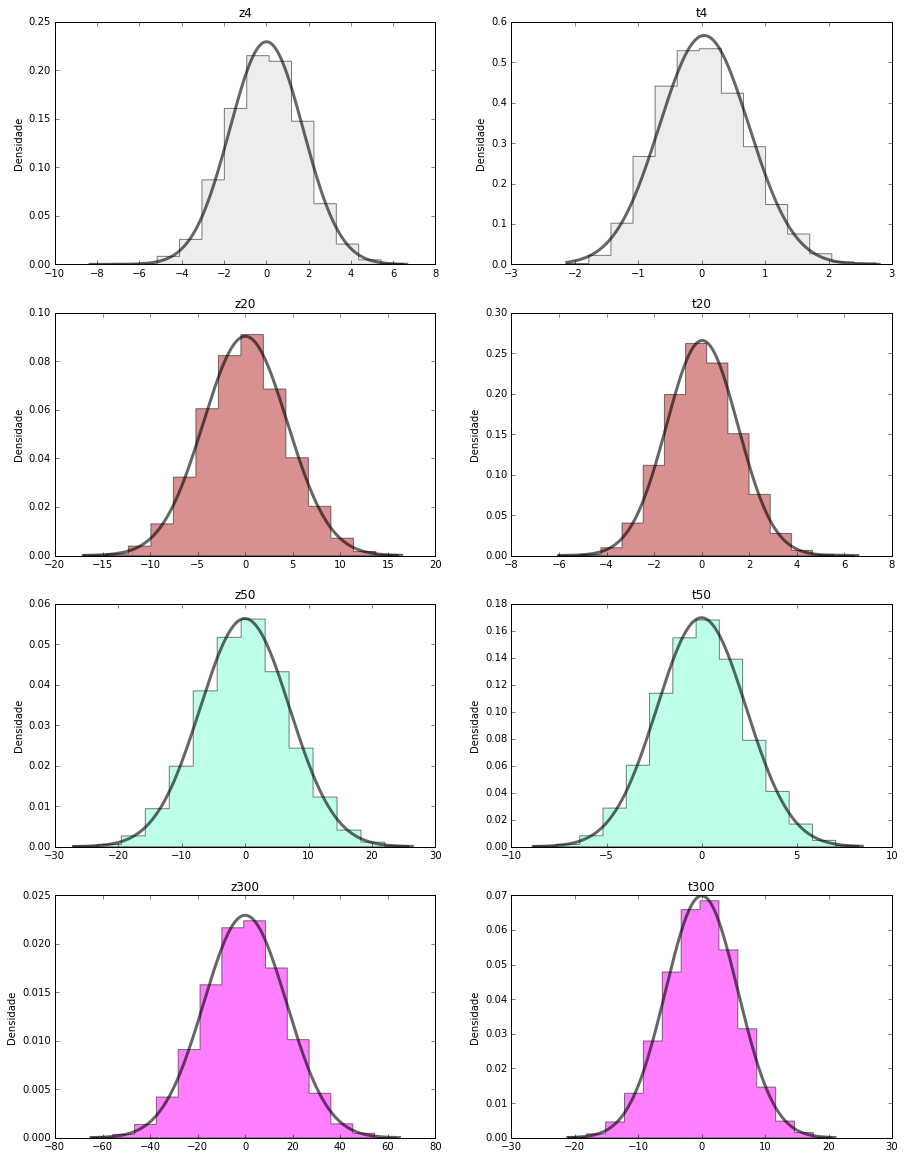

In [72]:
f, axarr = plt.subplots(4, 2, figsize = (15, 20))

#---------------------------------------------------------------------------------------------------------------------------
# n4

axarr[0, 0].hist(dfz4, bins = faixaz4, alpha = 0.5, color = 'gainsboro', normed = 1, histtype = 'stepfilled')
axarr[0, 0].plot(dfz4, stats.norm.pdf(dfz4, loc = medz4, scale = dpz4), lw = 3, alpha = 0.6, color = 'black')
axarr[0, 0].set_title('z4')
#axarr[0, 0].set_xlabel('')
axarr[0, 0].set_ylabel('Densidade')

axarr[0, 1].hist(dft4, bins = faixat4, alpha = 0.5, color = 'gainsboro', normed = 1, histtype = 'stepfilled')
axarr[0, 1].plot(dft4, stats.norm.pdf(dft4, loc = medt4, scale = dpt4), lw = 3, alpha = 0.6, color = 'black')
axarr[0, 1].set_title('t4')
#axarr[0, 1].set_xlabel('')
axarr[0, 1].set_ylabel('Densidade')

#---------------------------------------------------------------------------------------------------------------------------
# n20

axarr[1, 0].hist(dfz20, bins = faixaz20, alpha = 0.5, color = 'firebrick', normed = 1, histtype = 'stepfilled')
axarr[1, 0].plot(dfz20, stats.norm.pdf(dfz20, loc = medz20, scale = dpz20), lw = 3, alpha = 0.6, color = 'black')
axarr[1, 0].set_title('z20')
#axarr[1, 0].set_xlabel('')
axarr[1, 0].set_ylabel('Densidade')

axarr[1, 1].hist(dft20, bins = faixat20, alpha = 0.5, color = 'firebrick', normed = 1, histtype = 'stepfilled')
axarr[1, 1].plot(dft20, stats.norm.pdf(dft20, loc = medt20, scale = dpt20), lw = 3, alpha = 0.6, color = 'black')
axarr[1, 1].set_title('t20')
#axarr[1, 1].set_xlabel('')
axarr[1, 1].set_ylabel('Densidade')

#---------------------------------------------------------------------------------------------------------------------------
# n50

axarr[2, 0].hist(dfz50, bins = faixaz50, alpha = 0.5, color = 'aquamarine', normed = 1, histtype = 'stepfilled')
axarr[2, 0].plot(dfz50, stats.norm.pdf(dfz50, loc = medz50, scale = dpz50), lw = 3, alpha = 0.6, color = 'black')
axarr[2, 0].set_title('z50')
#axarr[2, 0].set_xlabel('')
axarr[2, 0].set_ylabel('Densidade')

axarr[2, 1].hist(dft50, bins = faixat50, alpha = 0.5, color = 'aquamarine', normed = 1, histtype = 'stepfilled')
axarr[2, 1].plot(dft50, stats.norm.pdf(dft50, loc = medt50, scale = dpt50), lw = 3, alpha = 0.6, color = 'black')
axarr[2, 1].set_title('t50')
#axarr[2, 1].set_xlabel('')
axarr[2, 1].set_ylabel('Densidade')

#---------------------------------------------------------------------------------------------------------------------------
# n300

axarr[3, 0].hist(dfz300, bins = faixaz300, alpha = 0.5, color = 'fuchsia', normed = 1, histtype = 'stepfilled')
axarr[3, 0].plot(dfz300, stats.norm.pdf(dfz300, loc = medz300, scale = dpz300), lw = 3, alpha = 0.6, color = 'black')
axarr[3, 0].set_title('z300')
#axarr[3, 0].set_xlabel('')
axarr[3, 0].set_ylabel('Densidade')

axarr[3, 1].hist(dft300, bins = faixat300, alpha = 0.5, color = 'fuchsia', normed = 1, histtype = 'stepfilled')
axarr[3, 1].plot(dft300, stats.norm.pdf(dft300, loc = medt300, scale = dpt300), lw = 3, alpha = 0.6, color = 'black')
axarr[3, 1].set_title('t300')
#axarr[3, 1].set_xlabel('')
axarr[3, 1].set_ylabel('Densidade')